<a href="https://colab.research.google.com/github/Narasimhan-G/Capstone_project/blob/main/Healthy_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train_df = pd.read_csv('/content/Train_Data.csv')
train_df.drop(['ID1','ID2','Any heriditary condition?'], axis = 1, inplace = True)
train_df.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,44,DX6,49,20.500470,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,39,DX3 DX4,20,26.076580,NO,URBAN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,29,DX6,1,21.420866,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,27,DX1,30,25.203247,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,9,DX6,40,19.355846,YES,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
train_df.shape

(25920, 15)

In [ ]:
train_df.dtypes

Specific ailments             int64
Food preference              object
Age                           int64
BMI                         float64
Smoker?                      object
Living in?                   object
Follow Diet                 float64
Physical activity           float64
Regular sleeping hours      float64
Alcohol consumption         float64
Social interaction          float64
Taking supplements          float64
Mental health management    float64
Illness count last year     float64
Healthy                       int64
dtype: object

In [ ]:
train_df.isnull().sum()

Specific ailments             0
Food preference              10
Age                           0
BMI                           0
Smoker?                       0
Living in?                    0
Follow Diet                 973
Physical activity           973
Regular sleeping hours      973
Alcohol consumption         973
Social interaction          973
Taking supplements          973
Mental health management    973
Illness count last year     973
Healthy                       0
dtype: int64

In [ ]:
cols = ['Follow Diet',
'Physical activity',
'Regular sleeping hours',
'Alcohol consumption',
'Social interaction',
'Taking supplements',
'Mental health management',
'Illness count last year']
for col in cols:
  train_df[col].fillna(train_df[col].mean(), inplace = True)

In [ ]:
train_df.isnull().sum()

Specific ailments            0
Food preference             10
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Follow Diet                  0
Physical activity            0
Regular sleeping hours       0
Alcohol consumption          0
Social interaction           0
Taking supplements           0
Mental health management     0
Illness count last year      0
Healthy                      0
dtype: int64

<Axes: >

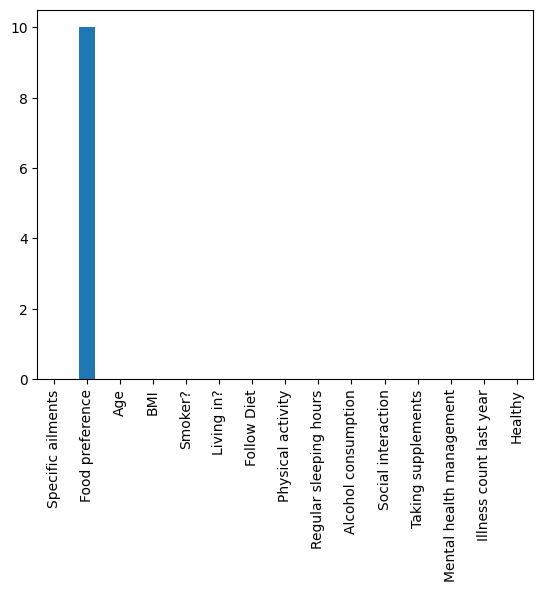

In [ ]:
train_df.isnull().sum().plot(kind = 'bar')

<Axes: xlabel='Food preference'>

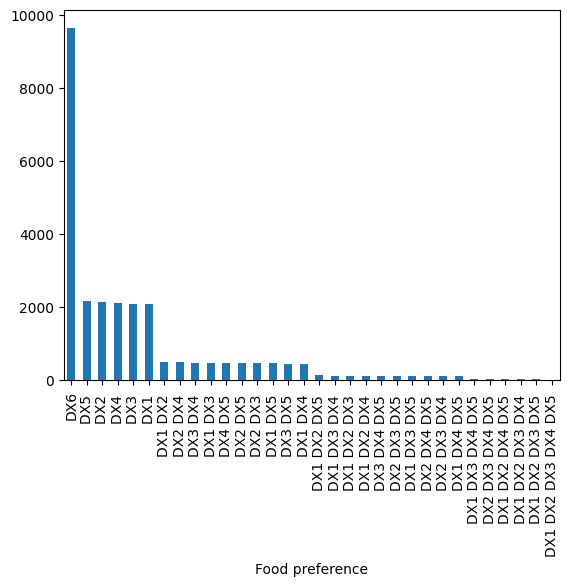

In [ ]:
train_df['Food preference'].value_counts().plot(kind = 'bar')

In [ ]:
train_df['Food preference'].fillna('DX6',inplace = True)

In [ ]:
train_df['Smoker?'].value_counts()

Smoker?
NO            14938
YES           10972
Cannot say       10
Name: count, dtype: int64

In [ ]:
train_df['Smoker?'] = train_df['Smoker?'].replace('Cannot say','NO')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Smoker?']= le.fit_transform(train_df['Smoker?'])
train_df['Living in?']= le.fit_transform(train_df['Living in?'])


In [ ]:
train_df_new = pd.get_dummies(train_df,columns = ['Food preference'])
train_df_new

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,...,Food preference_DX2 DX4 DX5,Food preference_DX2 DX5,Food preference_DX3,Food preference_DX3 DX4,Food preference_DX3 DX4 DX5,Food preference_DX3 DX5,Food preference_DX4,Food preference_DX4 DX5,Food preference_DX5,Food preference_DX6
0,44,49,20.500470,0,0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,39,20,26.076580,0,1,0.0,0.0,0.0,0.0,1.0,...,False,False,False,True,False,False,False,False,False,False
2,29,1,21.420866,0,1,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,27,30,25.203247,0,0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,9,40,19.355846,1,0,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,58,25.515286,1,0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
25916,39,16,27.094959,0,0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
25917,44,8,28.602921,0,0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
25918,52,52,21.909832,0,0,0.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Scaling the three columns specific ailments, age and BMI
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
colm = ['Specific ailments','Age','BMI','Illness count last year']
scaled_df = scaler.fit_transform(train_df_new[colm])

In [ ]:
scaled_df = pd.DataFrame(scaled_df,columns = colm)

In [ ]:
train_df_new[colm]= scaled_df
train_df_new.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,...,Food preference_DX2 DX4 DX5,Food preference_DX2 DX5,Food preference_DX3,Food preference_DX3 DX4,Food preference_DX3 DX4 DX5,Food preference_DX3 DX5,Food preference_DX4,Food preference_DX4 DX5,Food preference_DX5,Food preference_DX6
0,0.846154,0.328859,0.670794,0,0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0.750000,0.134228,0.864042,0,1,0.0,0.0,0.0,0.0,1.0,...,False,False,False,True,False,False,False,False,False,False
2,0.557692,0.006711,0.702691,0,1,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0.519231,0.201342,0.833776,0,0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.173077,0.268456,0.631125,1,0,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
x_train = train_df_new.drop('Healthy',axis = 1)
y_train = train_df_new['Healthy']

In [ ]:
#Dealing with the test data
df_test = pd.read_csv('/content/Test_Data.csv')
df_test.drop(['ID1','ID2','Any heriditary condition?'], axis=1, inplace = True)

In [ ]:
#Scaling data in test dataset
scaled_df_test = scaler.fit_transform(df_test[colm])

In [ ]:
#encoding the test data
df_test['Smoker?']= le.fit_transform(df_test['Smoker?'])
df_test['Living in?']= le.fit_transform(df_test['Living in?'])

In [ ]:
for col in cols:
  df_test[col].fillna(df_test[col].mean(), inplace = True)

In [ ]:
df_test['Food preference'].fillna('DX6',inplace = True)

In [ ]:
test_df_new =  pd.get_dummies(df_test, columns = ['Food preference'])
test_df_new.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,...,Food preference_DX2 DX4 DX5,Food preference_DX2 DX5,Food preference_DX3,Food preference_DX3 DX4,Food preference_DX3 DX4 DX5,Food preference_DX3 DX5,Food preference_DX4,Food preference_DX4 DX5,Food preference_DX5,Food preference_DX6
0,2,38,18.879331,2,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,5,46,21.231991,1,1,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,37,11,17.867876,1,0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3,44,10,26.886096,1,0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,37,3,23.362746,1,0,0.0,1.0,0.0,1.0,0.0,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
x_test = test_df_new

In [ ]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, max_iter = 200)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [ ]:
#Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
model1=RandomForestClassifier()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)


99.89583333333333
99.91715504280323
